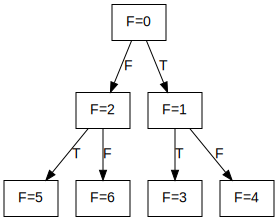

In [1]:
from graphviz import Digraph

dot = Digraph("Tree", node_attr={"shape": "record", "fontname": "helvetica"}, graph_attr={}, edge_attr={"fontname": "helvetica"})
dot.node("1", "F=0")
dot.node("1", "F=0")
dot.edge("1", "3", "F", labeljust="r")
dot.node("2", "F=1")
dot.node("3", "F=2")
dot.edge("1", "2", "T", labeljust="l")
dot.node("4", "F=3")
dot.edge("2", "4", "T", labeljust="l")
dot.node("5", "F=4")
dot.edge("2", "5", "F", labeljust="r")
dot.node("6", "F=5")
dot.edge("3", "6", "T", labeljust="l")
dot.node("7", "F=6")
dot.edge("3", "7", "F", labeljust="r")

dot

In [2]:
import numpy as np

from simplexlib.src.simplex import Table, Simplex
from src.branch_and_bound import BranchAndBound

c = np.array([2, 5, 3], dtype=np.float32)
A = np.array([2, 1, 2, 1, 2, 0, 0, 0.5, 1], dtype=np.float32).reshape(3, 3)
b = np.array([6, 6, 2], dtype=np.float32)

BranchAndBound.solve(c, A, b).visualize(node_attr={"shape": "box"})

F = -16.75, x_1 = 1.00, x_2 = 2.50, x_3 = 0.75
F = -16.75, x_1 = 1.00, x_2 = 2.50, x_3 = 0.75, x_7 = -0.50
F = -16.75, x_1 = 1.00, x_2 = 2.50, x_3 = 0.75, x_7 = -0.50, x_8 = -0.50
F = -16.75, x_1 = 1.00, x_2 = 2.50, x_3 = 0.75, x_7 = -0.50, x_8 = -0.50, x_9 = -0.50
F = -16.75, x_1 = 1.00, x_2 = 2.50, x_3 = 0.75, x_7 = -0.50, x_8 = -0.50, x_9 = -0.50, x_10 = -0.50
F = -16.75, x_1 = 1.00, x_2 = 2.50, x_3 = 0.75, x_7 = -0.50, x_8 = -0.50, x_9 = -0.50, x_10 = -0.50, x_11 = -0.50
F = -16.75, x_1 = 1.00, x_2 = 2.50, x_3 = 0.75, x_7 = -0.50, x_8 = -0.50, x_9 = -0.50, x_10 = -0.50, x_11 = -0.50, x_12 = -0.50
F = -16.75, x_1 = 1.00, x_2 = 2.50, x_3 = 0.75, x_7 = -0.50, x_8 = -0.50, x_9 = -0.50, x_10 = -0.50, x_11 = -0.50, x_12 = -0.50, x_13 = -0.50
F = -16.75, x_1 = 1.00, x_2 = 2.50, x_3 = 0.75, x_7 = -0.50, x_8 = -0.50, x_9 = -0.50, x_10 = -0.50, x_11 = -0.50, x_12 = -0.50, x_13 = -0.50, x_14 = -0.50
F = -16.75, x_1 = 1.00, x_2 = 2.50, x_3 = 0.75, x_7 = -0.50, x_8 = -0.50, x_9 = -0.50, x_10 = 

KeyboardInterrupt: 